# FFT: Effect of time domain positioning (2)

Two representations of a normal distribution are FFT transformed. In one representation the maximum value is exactly obtained within the time domain sampling. The other sample is over an exactly symmetrical time domain sample and thus does not contain the exact maximum.

## Import stuff

In [1]:
import numpy as np
from scipy import fftpack as fft
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Import functions for making normal distributions
import sys
sys.path.append('../packages/')
from normal_distribution import *

## Define, calculate and plot normal distribution samples with/without exact maximum and their FFTs

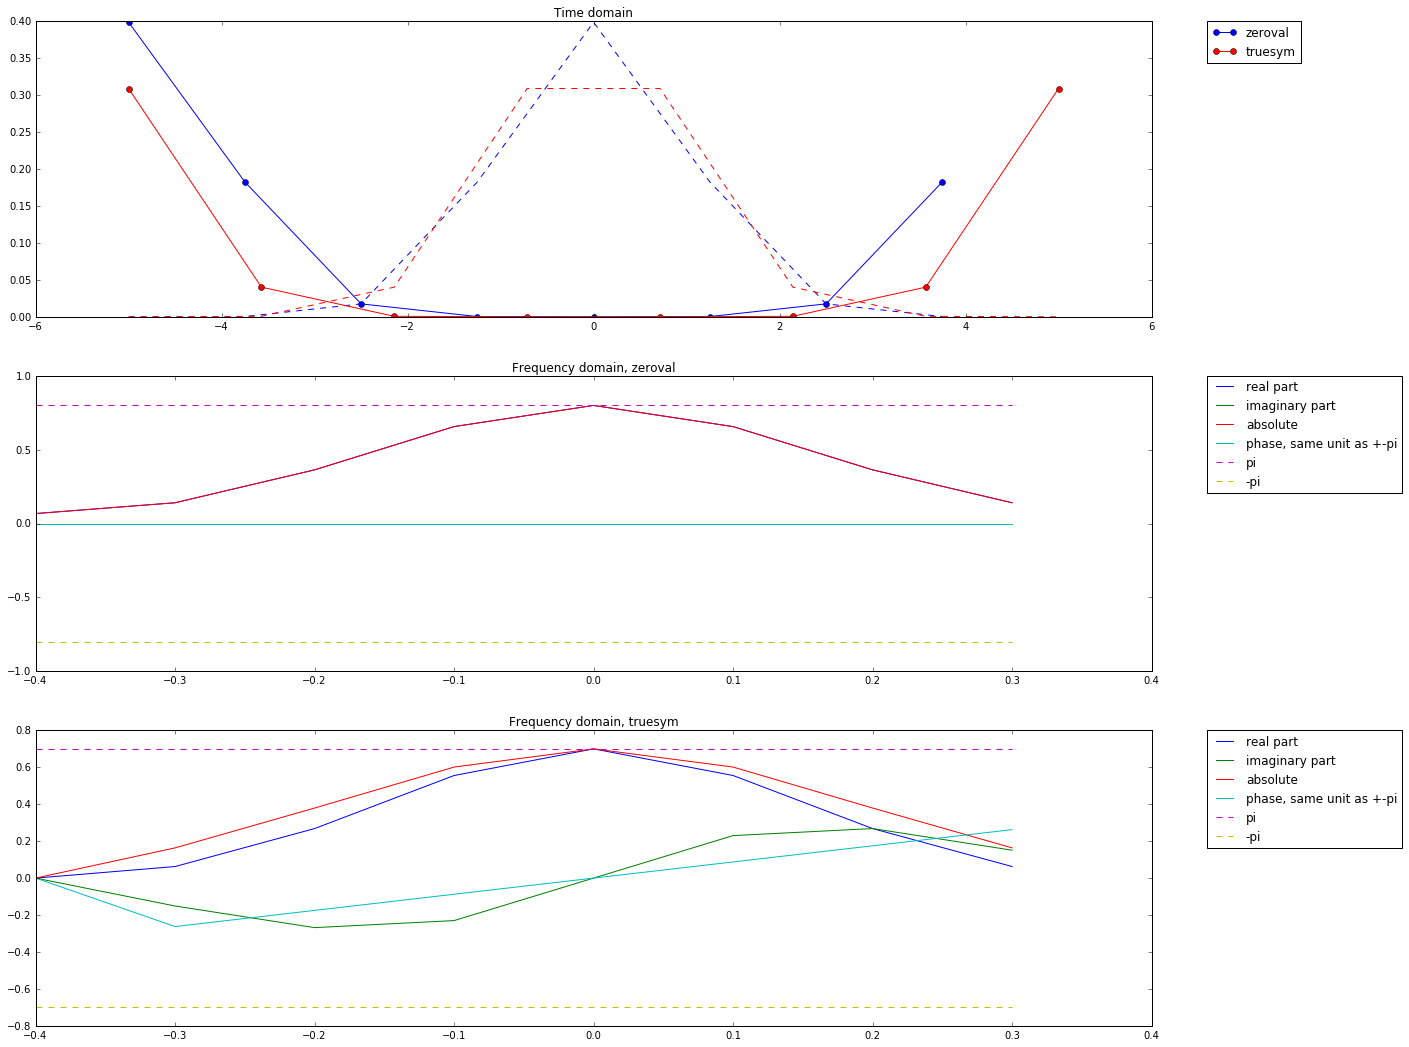

In [19]:
# Define normal distribution density function
sigma        = 1.
mu           = 0.
fct_g        = make_normal_distribution_density(sigma, mu, normalization=True, prefactor=1.)

# Define time domains and calculate sample values: ...
tres         = 8

# ... nearly symmetrical time domain, with sample point at t=0
tmin_zeroval = -5.*sigma
tmax_zeroval = -tmin_zeroval * (tres-2) / tres
t_zeroval    = np.linspace(tmin_zeroval, tmax_zeroval, tres)
temp         = fct_g(t_zeroval)
g_zeroval    = np.zeros(shape=temp.shape)
g_zeroval[0:tres//2]    = temp[tres//2:tres]
g_zeroval[tres//2:tres] = temp[0:tres//2]         
g_zeroval_c  = temp
del temp

# ... truely symmetrical time domain, no sample point at t=0
tmin_truesym = tmin_zeroval
tmax_truesym = -tmin_truesym
t_truesym    = np.linspace(tmin_truesym, tmax_truesym, tres)
temp         = fct_g(t_truesym)
g_truesym    = np.zeros(shape=temp.shape)
g_truesym[0:tres//2]    = temp[tres//2:tres]
g_truesym[tres//2:tres] = temp[0:tres//2]         
g_truesym_c  = temp
del temp

# Calculate frequency spectra and handy representations
f            = fft.fftfreq(tres, t_zeroval[1]-t_zeroval[0])
f            = fft.fftshift(f)

G_zeroval    = fft.fft(g_zeroval)
G_zeroval    = fft.fftshift(G_zeroval)
G_zeroval_real = np.real( G_zeroval)
G_zeroval_imag = np.imag( G_zeroval)
G_zeroval_abs  = np.abs(  G_zeroval)
G_zeroval_phs  = np.angle(G_zeroval) / np.pi    * np.max(G_zeroval_abs)
G_zeroval_pi   = np.ones(shape=G_zeroval.shape) * np.max(G_zeroval_abs)

G_truesym    = fft.fft(g_truesym)
G_truesym    = fft.fftshift(G_truesym)
G_truesym_real = np.real( G_truesym)
G_truesym_imag = np.imag( G_truesym)
G_truesym_abs  = np.abs(  G_truesym)
G_truesym_phs  = np.angle(G_truesym) / np.pi    * np.max(G_truesym_abs)
G_truesym_pi   = np.ones(shape=G_truesym.shape) * np.max(G_truesym_abs)



# Plot
fig = plt.figure(figsize=(20, 18))

sub1 = fig.add_subplot(3, 1, 1)
sub1.set_title('Time domain')
sub1.plot(t_zeroval, g_zeroval,   '-o', color='b', label='zeroval')
sub1.plot(t_zeroval, g_zeroval_c, '--', color='b')
sub1.plot(t_truesym, g_truesym,   '-o', color='r', label='truesym')
sub1.plot(t_truesym, g_truesym_c, '--', color='r')
sub1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

sub2 = fig.add_subplot(3, 1, 2)
sub2.set_title('Frequency domain, zeroval')
sub2.plot(f, G_zeroval_real, '-',  label='real part')
sub2.plot(f, G_zeroval_imag, '-',  label='imaginary part')
sub2.plot(f, G_zeroval_abs,  '-',  label='absolute')
sub2.plot(f, G_zeroval_phs,  '-',  label='phase, same unit as +-pi')
sub2.plot(f, G_zeroval_pi,   '--', label='pi')
sub2.plot(f, -G_zeroval_pi,  '--', label='-pi')
sub2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

sub3 = fig.add_subplot(3, 1, 3)
sub3.set_title('Frequency domain, truesym')
sub3.plot(f, G_truesym_real, '-',  label='real part')
sub3.plot(f, G_truesym_imag, '-',  label='imaginary part')
sub3.plot(f, G_truesym_abs,  '-',  label='absolute')
sub3.plot(f, G_truesym_phs,  '-',  label='phase, same unit as +-pi')
sub3.plot(f, G_truesym_pi,   '--', label='pi')
sub3.plot(f, -G_truesym_pi,  '--', label='-pi')
sub3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
